# Generate Curves with Different hbar Values
Generate a series of elastica curves using different hbar values. Create multiple curve examples with hbar values ranging from 0.1 to 3.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory to path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import elastica-specific functions
from src.elastica import elastica_in_TI
from src.visualization.plotting import plot_curves

In [2]:
# Parameters for elastica curves with varying hbar
hbar_params = [
    [-0.07, -1.3, -1.05, 1.132],
    [-0.07, -1.5, -1.05, 1.13],
    [-0.171, -1.42, -1.23, 1.13],
    [0.5, -1.6, -1, 1.15],
    [0.8, 1.35, -1, 1.1],
    [-0.06, -4.2, 2.5, 1.15],
    [-0.5, -1.64, 3.05, 1.16]
]

hbar_values = [3, 2, 1, 0.5, 0.2, 0.15, 0.1]  # Corresponding to the legend values

# Dictionary to store results
ETB_results = dict()

# Compute elastica curves for each hbar value
for ii, (param, hbar) in enumerate(zip(hbar_params, hbar_values)):
    # Define common inducer parameters
    inducers = {
        'left': [-0.5, 0, 45, -1],
        'right': [0.5, 0, -45, -1],
    }
    
    # Compute the elastica curve
    tl, x, y, theta, dtheta, ddtheta, err = elastica_in_TI(-0.5, 0, 45, -1, 0.5, 0, -45, -1, 0.001, param, hbar)
    
    # Store the results
    completion = {
        'tl': tl,
        'x': x,
        'y': y,
        'theta': theta,
        'dtheta': dtheta,
        'ddtheta': ddtheta,
        'err': err
    }
    
    ETB_results[f"curve_{ii}"] = {
        "inducers": inducers, 
        "completion": completion, 
        "opt": param,
        "hbar": hbar
    }

Elastica in TI: err:0.000310 c:-0.019714 phi:-1.610006 g0:-0.980948 l=1.131801
Elastica in TI: err:0.000759 c:-0.071051 phi:-1.585997 g0:-1.053409 l=1.130501
Elastica in TI: err:0.000686 c:-0.170113 phi:-1.530255 g0:-1.242728 l=1.130497
Elastica in TI: err:0.000412 c:0.555736 phi:-1.537969 g0:-1.127148 l=1.129957
Elastica in TI: err:0.000238 c:0.627712 phi:1.556487 g0:-0.813334 l=1.131685
Elastica in TI: err:0.000889 c:-0.056358 phi:-4.096654 g0:2.722444 l=1.157500
Elastica in TI: err:0.001156 c:-0.473171 phi:-1.666687 g0:3.063205 l=1.161670


# Visualize the Results and Analyze hbar Effects
Here we plot all the generated curves on the same graph with a different color for each hbar value. We analyze and explain how changing the hbar parameter affects the shape and properties of the elastica curves.

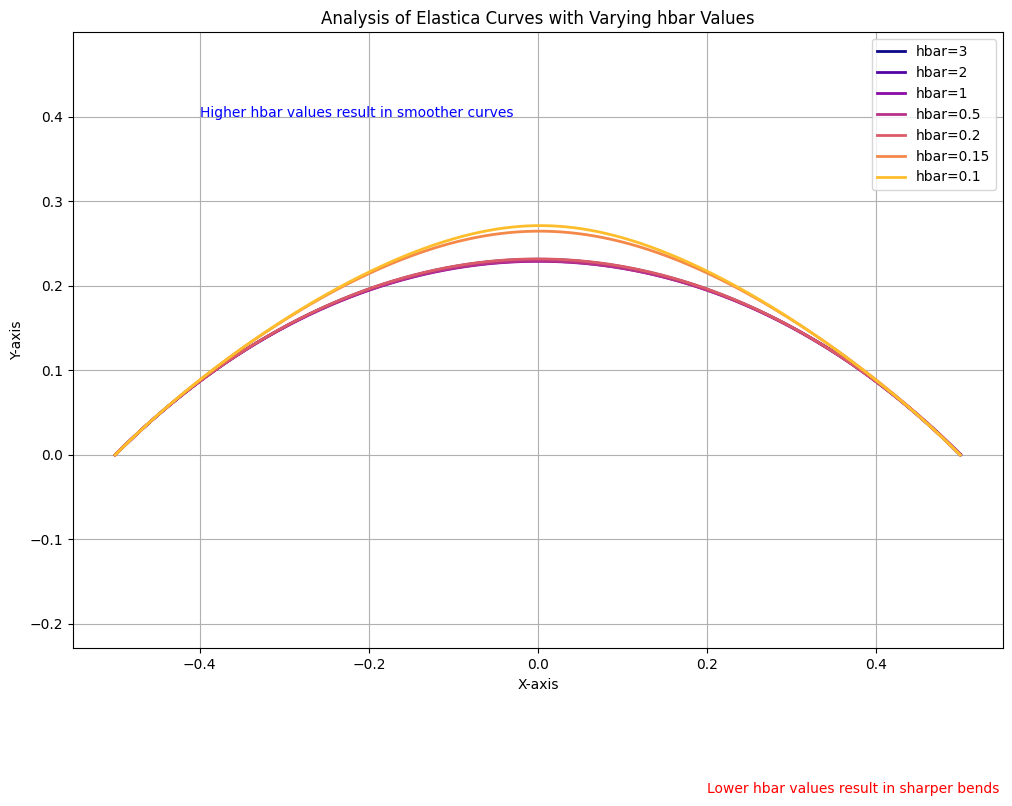

In [ ]:
# Initialize the plot
plt.figure(figsize=(12, 8))
plt.axis('equal')

# Analyze and plot curves for each hbar value
# Use the data already stored in ETB_results instead of recomputing
# Sort curves by hbar value (descending) to maintain consistent order
sorted_curves = sorted(ETB_results.items(), key=lambda x: x[1]['hbar'], reverse=True)

for i, (curve_id, curve_data) in enumerate(sorted_curves):
    x = curve_data['completion']['x']
    y = curve_data['completion']['y']
    hbar = curve_data['hbar']
    plt.plot(x, y, color=plt.cm.plasma(i / len(ETB_results)), linewidth=2, label=f'hbar={hbar}')

# Add annotations for theoretical implications
plt.text(-0.4, 0.4, 'Higher hbar values result in flatter curves', fontsize=10, color='blue')
plt.text(0.2, -0.4, 'Lower hbar values result in sharper bends', fontsize=10, color='red')

# Add legend, title, and labels
plt.legend(loc='best')
plt.title('Analysis of Elastica Curves with Varying hbar Values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()